In [1]:
import sys

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data_file = './data/embalses_1988_2023.csv'

In [4]:
df = pd.read_csv(data_file)

In [5]:
df

,AMBITO_NOMBRE,EMBALSE_NOMBRE,FECHA,AGUA_TOTAL,AGUA_ACTUAL,ELECTRICO_FLAG
0,Miño - Sil,Albarellos,01/05/88 00:00:00,"91,00","32,00",1
1,Miño - Sil,Albarellos,01/12/88 00:00:00,"91,00","44,00",1
2,Miño - Sil,Albarellos,01/19/88 00:00:00,"91,00","42,00",1
3,Miño - Sil,Albarellos,01/26/88 00:00:00,"91,00","43,00",1
4,Miño - Sil,Albarellos,02/02/88 00:00:00,"91,00","65,00",1
...,...,...,...,...,...,...
655066,Guadalete-Barbate,Zahara-El Gastor,03/14/23 00:00:00,"223,00","46,00",0
655067,Guadalete-Barbate,Zahara-El Gastor,03/21/23 00:00:00,"223,00","46,00",0
655068,Guadalete-Barbate,Zahara-El Gastor,03/28/23 00:00:00,"223,00","46,00",0
655069,Guadalete-Barbate,Zahara-El Gastor,04/04/23 00:00:00,"223,00","46,00",0


In [6]:
df['AGUA_TOTAL'] = df['AGUA_TOTAL'].str.replace(',','.').astype('float')
df['AGUA_ACTUAL'] = df['AGUA_ACTUAL'].str.replace(',','.').astype('float')
df['ELECTRICO_FLAG'] = df['ELECTRICO_FLAG'].astype('bool')

In [7]:
%%time 
df['FECHA'] = pd.to_datetime(df['FECHA'])

CPU times: user 27.5 s, sys: 4.63 ms, total: 27.5 s
Wall time: 27.5 s


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655071 entries, 0 to 655070
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   AMBITO_NOMBRE   655071 non-null  object        
 1   EMBALSE_NOMBRE  655071 non-null  object        
 2   FECHA           655071 non-null  datetime64[ns]
 3   AGUA_TOTAL      655069 non-null  float64       
 4   AGUA_ACTUAL     655069 non-null  float64       
 5   ELECTRICO_FLAG  655071 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 25.6+ MB


In [9]:
%%time
df = pd.read_csv(data_file, parse_dates=['FECHA'], dtype={'AGUA_TOTAL':'float', 'AGUA_ACTUAL':'float', 'ELECTRICO_FLAG':'bool'}, decimal=',')

CPU times: user 32.4 s, sys: 7.77 ms, total: 32.4 s
Wall time: 32.5 s


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655071 entries, 0 to 655070
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   AMBITO_NOMBRE   655071 non-null  object        
 1   EMBALSE_NOMBRE  655071 non-null  object        
 2   FECHA           655071 non-null  datetime64[ns]
 3   AGUA_TOTAL      655069 non-null  float64       
 4   AGUA_ACTUAL     655069 non-null  float64       
 5   ELECTRICO_FLAG  655071 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 25.6+ MB


In [16]:
df.describe()

,AGUA_TOTAL,AGUA_ACTUAL
count,655069.000000,655069.000000
mean,148.649006,84.219786
std,351.455727,217.509846
min,0.000000,0.000000
25%,14.000000,7.000000
50%,37.000000,20.000000
75%,126.000000,69.000000
max,3219.000000,3193.000000


In [17]:
df.groupby('EMBALSE_NOMBRE').agg(['max','mean', 'min'])

/tmp/ipykernel_192899/3139707767.py:1: FutureWarning: ['AMBITO_NOMBRE'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('EMBALSE_NOMBRE').agg(['max','mean', 'min'])


FECHA                                           \
                           max                          mean        min   
EMBALSE_NOMBRE                                                            
Aceña               2023-04-11 2005-08-15 21:59:40.466630400 1987-10-06   
Agavanzal, Nª Sª de 2023-04-11 2005-08-23 00:00:00.000000128 1988-01-05   
Agrio (Aznalcollar) 2023-04-11 2005-08-23 00:00:00.000000128 1988-01-05   
Aguascebas          2023-04-11 2005-08-23 00:00:00.000000128 1988-01-05   
Aguijón, El         2023-04-11 2005-08-23 00:00:00.000000128 1988-01-05   
...                        ...                           ...        ...   
Zocueca             2012-06-26 2011-05-06 12:00:00.000000000 2010-03-16   
Zufre               2023-04-11 2005-08-23 22:33:07.826087040 1988-01-05   
Zújar               2023-04-11 2005-08-23 00:00:00.000000128 1988-01-05   
Águeda              2023-04-11 2005-08-23 00:00:00.000000128 1988-01-05   
Úzquiza             2023-04-11 2005-08-23 00:00:00.000000128 1988-01-05   

                    AGUA_TOTAL                    AGUA_ACTUAL              \
                           max        mean    min         max        mean   
EMBALSE_NOMBRE                                                              
Aceña                     24.0   22.437330    0.0        24.0   12.948454   
Agavanzal, Nª Sª de       36.0   24.619229    0.0        36.0   20.630636   
Agrio (Aznalcollar)       40.0   23.432917   20.0        40.0   15.824009   
Aguascebas                 6.0    4.966866    0.0        17.0    3.521456   
Aguijón, El               11.0    7.522542    0.0        12.0    6.456274   
...                        ...         ...    ...         ...         ...   
Zocueca                    5.0    5.000000    5.0         1.0    1.000000   
Zufre                    179.0  151.289674    0.0       178.0  105.097826   
Zújar                    723.0  331.677892  275.0       569.0  198.140684   
Águeda                    24.0   22.922325   22.0        23.0   14.716458   
Úzquiza                   75.0   70.926127    0.0        75.0   44.636611   

                         ELECTRICO_FLAG              
                     min            max mean    min  
EMBALSE_NOMBRE                                       
Aceña                0.0          False  0.0  False  
Agavanzal, Nª Sª de  0.0           True  1.0   True  
Agrio (Aznalcollar)  4.0          False  0.0  False  
Aguascebas           0.0          False  0.0  False  
Aguijón, El          0.0          False  0.0  False  
...                  ...            ...  ...    ...  
Zocueca              1.0          False  0.0  False  
Zufre                0.0          False  0.0  False  
Zújar                4.0          False  0.0  False  
Águeda               1.0          False  0.0  False  
Úzquiza              0.0          False  0.0  False  

[399 rows x 12 columns]

In [31]:
nombre_embalse = 'Sau'

In [32]:
df.groupby('EMBALSE_NOMBRE').agg(['max','mean', 'min']).get('AGUA_TOTAL').sort_values('max').loc[[nombre_embalse]]

/tmp/ipykernel_192899/861154356.py:1: FutureWarning: ['AMBITO_NOMBRE'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('EMBALSE_NOMBRE').agg(['max','mean', 'min']).get('AGUA_TOTAL').sort_values('max').loc[[nombre_embalse]]


,max,mean,min
EMBALSE_NOMBRE,,,
Sau,169.0,166.692558,165.0


<AxesSubplot: xlabel='FECHA'>

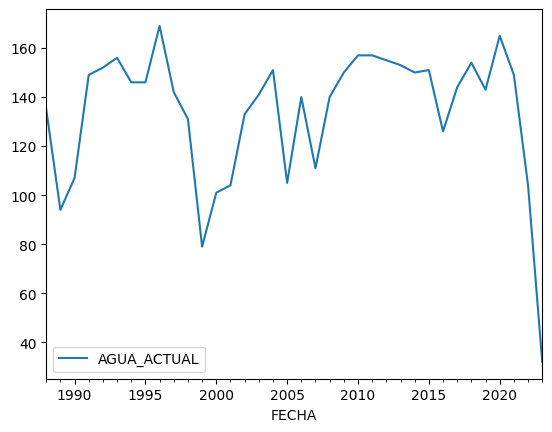

In [33]:
df.query(f'EMBALSE_NOMBRE=="{nombre_embalse}"').sort_values('FECHA').get(['FECHA', 'AGUA_ACTUAL']).set_index('FECHA').resample('Y').max().plot()

In [34]:
embalse = df.query(f'EMBALSE_NOMBRE=="{nombre_embalse}"').sort_values('FECHA').set_index('FECHA').resample('M').mean(numeric_only=True).reset_index()

In [35]:
embalse['YEAR'] = embalse['FECHA'].dt.year
embalse['MONTH'] = embalse['FECHA'].dt.month

In [36]:
embalse

,FECHA,AGUA_TOTAL,AGUA_ACTUAL,ELECTRICO_FLAG,YEAR,MONTH
0,1988-01-31,169.0,117.50,0.0,1988,1
1,1988-02-29,169.0,117.75,0.0,1988,2
2,1988-03-31,169.0,94.20,0.0,1988,3
3,1988-04-30,169.0,99.75,0.0,1988,4
4,1988-05-31,169.0,126.20,0.0,1988,5
...,...,...,...,...,...,...
419,2022-12-31,165.0,30.75,0.0,2022,12
420,2023-01-31,165.0,31.60,0.0,2023,1
421,2023-02-28,165.0,28.25,0.0,2023,2
422,2023-03-31,165.0,16.25,0.0,2023,3


In [37]:
data = embalse.pivot(index='MONTH', columns='YEAR', values='AGUA_ACTUAL')

In [38]:
import matplotlib.pyplot as plt

In [39]:

def draw_heatmap(data, title='Embalse'):
    # Create a pivot table to aggregate the temperature anomaly values by year and month
    
    # Define a color palette ranging from blue to red
    cmap = sns.color_palette("coolwarm_r", as_cmap=True)

    # Create the warming stripe plot using the heatmap function from Seaborn
    fig, ax = plt.subplots(figsize=(8, 2))
    ax = sns.heatmap(data, cmap=cmap, cbar=False, linewidths=0, linecolor='gray')
    
    # Hide the x-axis and y-axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')


    # Set the title of the plot to 'Warming Stripe'
    ax.set_title(title)
    
    # Show the plot
    plt.show()

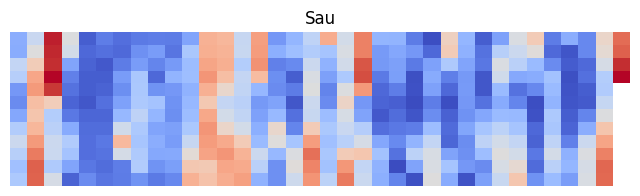

In [40]:
draw_heatmap(data, nombre_embalse)